<a href="https://colab.research.google.com/github/parklaus1078/dl_simple_practices/blob/main/dl_simple_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content

/content


In [ ]:
%pwd

'/content'

# 제조 데이터의 분류기 실습
---
- sklearn의 model을 사용하여 Classifier를 학습한다.
- 생성한 Classifier의 성능 개선을 위한 방법을 이해한다.
- Classifier에서 사용가능한 주요 성능 지표를 이해한다.

## 문제: Binary Classification

In [ ]:
# Library & Data load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("exercise1.csv")

In [ ]:
df.head()

,a1,a2,a3,a4,a5,a6,target
0,24,0.29,700,0.013,100,1.4,0
1,44,0.47,400,0.012,20,0.6,0
2,13,0.21,1000,0.045,40,1.7,0
3,8,0.25,400,0.008,60,0.8,0
4,38,0.15,700,0.044,40,1.2,0


In [ ]:
df.shape

(1000, 7)

In [ ]:
df["target"].unique()           # Target column's values

array([0, 1])

In [ ]:
df["target"].value_counts()

0    588
1    412
Name: target, dtype: int64

## 데이터 탐색

In [ ]:
# Data exploration
df.describe()

,a1,a2,a3,a4,a5,a6,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.821000,0.283240,821.300000,0.027491,117.180000,1.712600,0.412000
std,10.502631,0.103347,254.560624,0.010786,45.428089,0.707079,0.492441
min,5.000000,0.050000,300.000000,0.005000,20.000000,0.200000,0.000000
25%,25.000000,0.240000,700.000000,0.021000,90.000000,1.300000,0.000000
50%,29.000000,0.290000,900.000000,0.027000,120.000000,1.800000,0.000000
75%,35.000000,0.340000,1000.000000,0.034000,150.000000,2.300000,1.000000
max,50.000000,0.500000,1200.000000,0.050000,200.000000,2.900000,1.000000


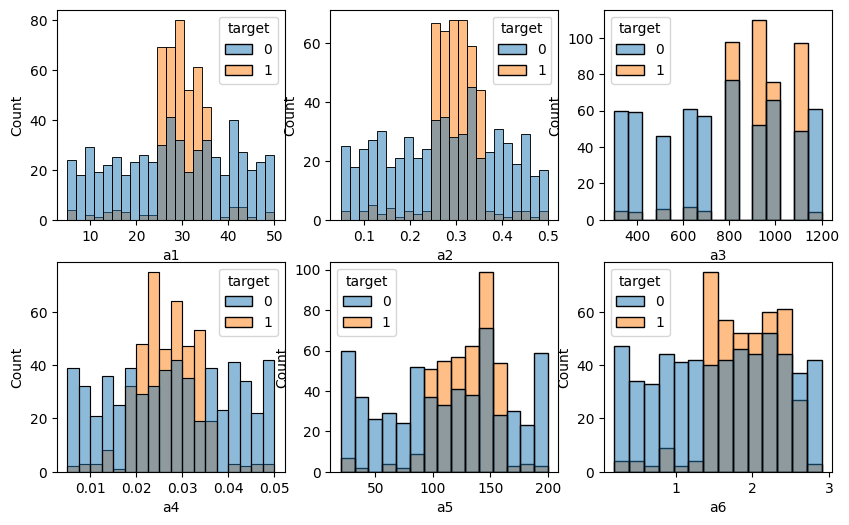

In [ ]:
# Data Visualization
nrows, ncols = 2, 3                                                 # coordinate of plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)                   # plots are described in 2 x 3 formation
fig.set_size_inches(10, 6)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j
        sns.histplot(x=df.columns[attr], data=df, ax=axs[i][j], hue="target")

## 주요 코드
---
1. Split a dataset into trainset and test set
    - ```train_test_split```
2. Generate Model Instance
    - ```DecisionTreeClassifier```
3. train
    - ```.fit(X, y)```
        - X 를 y에 맞춘다.
4. Evaluate
    - Classifier's evaluation : Accuracy
    - ```accuracy_score()```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Split data
X = df.iloc[:, :6]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Generate Model Instance
model = DecisionTreeClassifier(random_state=42)

# 3. Train
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

## 다른 분류기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Split data
# splitted already

# 2. Generate Model Instance
rf_cls = RandomForestClassifier(random_state=42)
gb_cls = GradientBoostingClassifier(random_state=42)
xgb_cls = XGBClassifier(random_state=42)
lgb_cls = LGBMClassifier(random_state=42)

# 3. Train
rf_cls.fit(X_train, y_train)
gb_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
lgb_cls.fit(X_train, y_train)

# 4. Evaluate
y_pred_rf = rf_cls.predict(X_test)
y_pred_gb = gb_cls.predict(X_test)
y_pred_xgb = xgb_cls.predict(X_test)
y_pred_lgb = lgb_cls.predict(X_test)

print("Random Forest Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_rf)))
print("Gradident Boosting Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_gb)))
print("XGBoost Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_xgb)))
print("light gbm Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_lgb)))

[LightGBM] [Info] Number of positive: 330, number of negative: 470
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412500 -> initscore=-0.353640
[LightGBM] [Info] Start training from score -0.353640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## Quiz
다음과 같이 SVC를 사용하여 모델을 생성하고, 학습을 시켰을 때 모델의 정확도를 구하시오. 모델의 성능을 높이기 위해서 할 수 있는 방법은?

In [ ]:
# 문제 지문
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)


0.72

In [ ]:
# 해답 : 학습 데이터의 독립 변수들이 스케일이 다름. 스케일링을 해줘야함
X_train

,a1,a2,a3,a4,a5,a6
330,35,0.23,1100,0.034,40,2.1
535,35,0.29,800,0.028,110,2.4
154,39,0.29,300,0.041,140,1.8
210,23,0.14,1000,0.032,170,0.5
8,32,0.26,800,0.029,150,2.6
...,...,...,...,...,...,...
387,34,0.32,900,0.024,110,2.6
490,5,0.42,700,0.039,50,2.1
456,27,0.29,900,0.020,130,2.0
784,28,0.32,800,0.031,140,1.4


In [ ]:
# 해법
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scale = sc.fit_transform(X)                           # 중요한 점: training set와 test set의 스케일링 기준이 같아야함. 방안: 전체 스케일링 후 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42, stratify=y)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

# 자전거 대여량 예측 모델 실습
---
- sklearn의 model을 사용하여 Regressor를 학습한다.
- 생성한 Regressor의 성능 개선을 위한 방법을 이해한다.
- Regressor에서 사용가능한 주요 성능 지표를 이해한다.

## 문제 정의
---
https://www.kaggle.com/c/bike-sharing-demand </br>
- Data Fields
    - **datetime** - hourly date + timestamp  
    - **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter
    - **holiday** - whether the day is considered a holiday
    - **workingday** - whether the day is neither a weekend nor holiday
    - **weather**
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - **temp** - temperature in Celsius
    - **atemp** - "feels like" temperature in Celsius
    - **humidity** - relative humidity
    - **windspeed** - wind speed
    - **casual** - number of non-registered user rentals initiated
    - **registered** - number of registered user rentals initiated
    - **count** - number of total rentals

In [ ]:
# !pip install -q kaggle

In [ ]:
# !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle competitions download -c bike-sharing-demand

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 76.1MB/s]


In [ ]:
# Library & Data load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("exercise2.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

## 데이터 탐색


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: xlabel='count', ylabel='Count'>

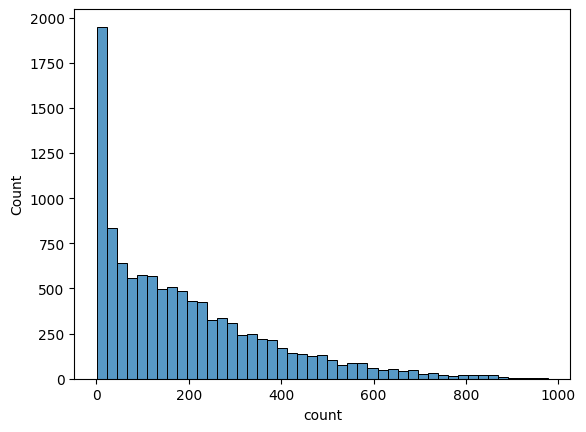

In [ ]:
sns.histplot(x = df['count'])

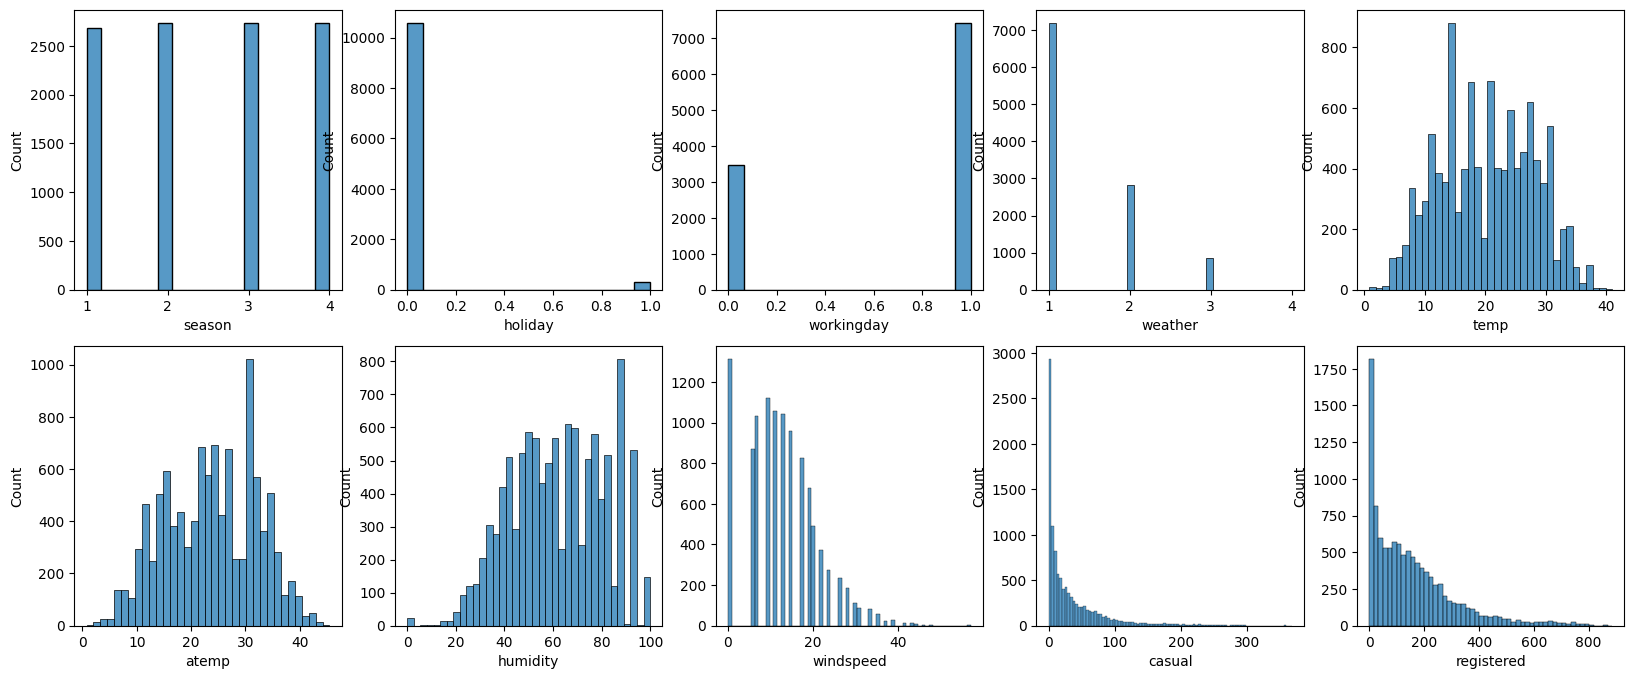

In [ ]:
nrows, ncols = 2, 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20, 8)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j + 1
        sns.histplot(x=df.columns[attr], data=df, ax=axs[i][j])

<ipython-input-20-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

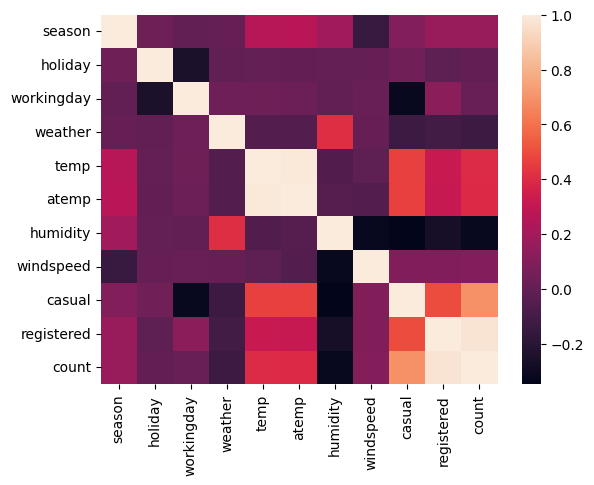

In [ ]:
sns.heatmap(df.corr())                  # 숫자가 높을수록(색상이 연해질수록) 상관 관계가 높음

## 주요 코드 미리보기
---
1. Split Data
2. Generate Model Instance
3. Training
4. Evaluate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

y = df["count"]
X = df.drop(["datetime", "count"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mean_squared_log_error(y_test, y_pred)

3.248909885621264e-29

<Axes: >

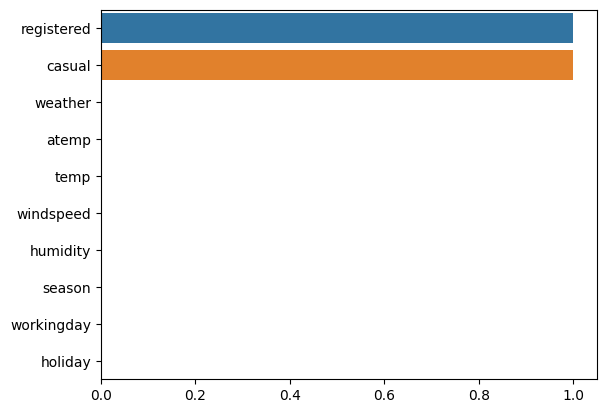

In [ ]:
coef = pd.Series(lr_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
# registered, casual 피쳐가 count 값과 밀접한 관계가 있다.
# 하지만, 이 피쳐들은 말 그대로, 자전거를 대여한 비회원과 회원 수이고 둘의 합이 count이기 때문에 독립 변수로 사용할 수 없는 피쳐들이다. => 기각.

## 코드 개선
---
문제: 앞서 알아낸 것처럼, 상관계수를 따져보았을 때, registered 와 casual이라는 피쳐들이 count 값에 가장 큰 영향력을 행사한다는 것으로 추정했지만, 두 피쳐의 값들은 자전거를 대여한 비회원과 회원 수를 나타내는 값들이고, 그 둘의 합이 count 피쳐를 만들어내는 형태이기 때문에, 이 분석은 잘못되었다. 그렇다면, 분석을 개선하기 위하여 취하여야 할 행위는 무엇일까?
- Data 관점
    - 의미있는 feature 생성
    - 불필요한 feature 삭제
    - 데이터 형태 변환: scaling, encoding
- Model 관점
    - Linear Regressor
    - RandomForest Regressor
    - XGBRegressor
    - LGBMRgressor

## Data 관점

### 의미있는 feature 생성

In [ ]:
df["datetime"] = df["datetime"].astype("datetime64")
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### 불필요한 feature 삭제

In [ ]:
df.drop(["datetime", "casual", "registered"], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


### 데이터 형태 변환
- y를 정규 분포로 변환
    - 왜? count의 히스토그램을 보았을 때, 정규 분포가 아니고 skewed 형태인데, 본디 머신러닝의 기본 전재는 "데이터가 정규 분포를 따른다."이다. 고로, 종속 변수를 정규 분포로 변환해주어야 한다.

<Axes: xlabel='count', ylabel='Count'>

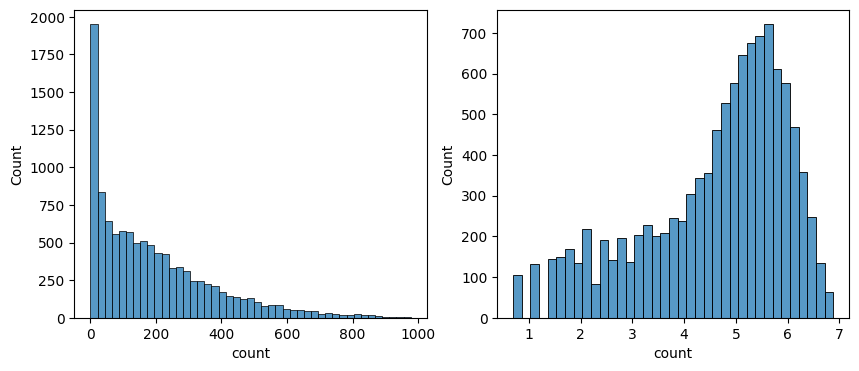

In [ ]:
y_log = np.log1p(y)

nrows, ncols = 1, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(10, 4)
sns.histplot(y, ax=axs[0])
sns.histplot(y_log, ax=axs[1])

- Categorical 변수 원핫 인코딩 : ```pd.get_dummies(df=데이터셋, columns=[범주형 변수 피쳐들])```

In [ ]:
df = pd.get_dummies(df, columns=["year", "month", "day", "hour", "holiday", "workingday", "season", "weather"])

In [ ]:
df.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'year_2011',
       'year_2012', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [ ]:
y = y_log
X = df.drop(["count"], axis=1, inplace=False)

- Z-score 변환

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))      # y 값들이 현재 로그 스케일링 되어있기 때문에 explonential 변환(e*)로 돌려놓음

0.3418249583393837

<Axes: >

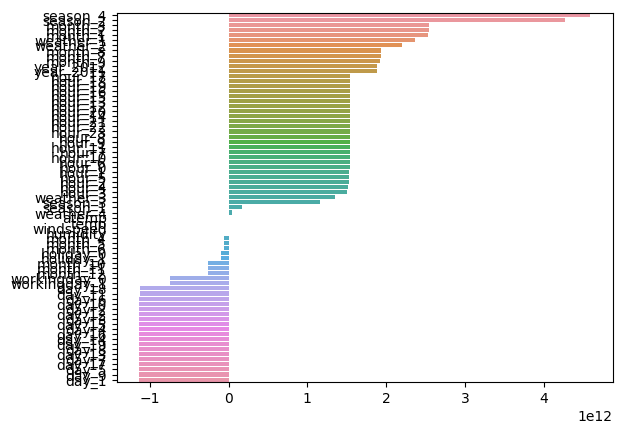

In [ ]:
coef = pd.Series(lr_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
coef_sort.head(10)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## Model 관점
- RandomForest
- XGBoost
- Light GBM

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42, verbose=-1)

model_list = [lr_model, rf_model, xgb_model, lgbm_model]
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    m = model.__class__.__name__
    score = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))
    print("{0} msle : {1:.3f}".format(m, score))
# light gbm has the least means squared log error value. light gbm shows the best performance

LinearRegression msle : 0.342
RandomForestRegressor msle : 0.125
XGBRegressor msle : 0.119
LGBMRegressor msle : 0.110


# 군집 모델 실습


## 실습 목표
---
- sklearn의 model을 사용하여 cluster 모델을 생성
- Cluster에서 사용 가능한 주요 성능 지표를 이해한다.

## 문제 정의
---
https://www.kaggle.com/datasets/vjhoudhary7/customer-segmentation-tutorial-in-python


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("exercise3.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

## 데이터 탐색

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='count'>

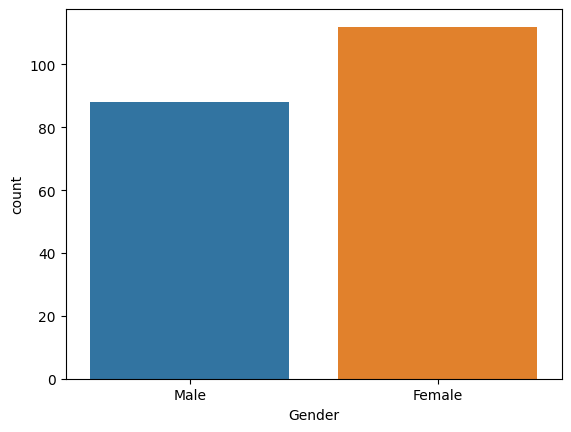

In [ ]:
sns.countplot(x=df["Gender"])

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

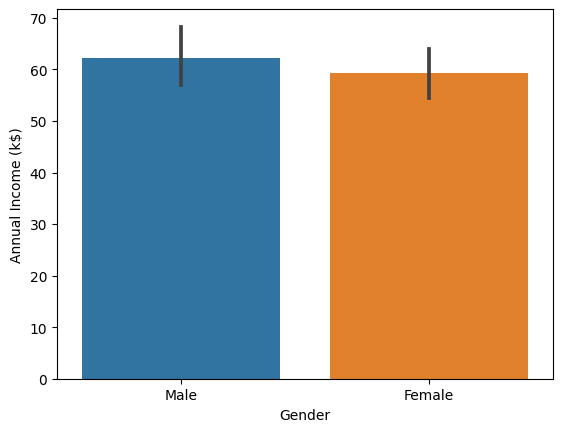

In [ ]:
sns.barplot(x="Gender", y="Annual Income (k$)", data=df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

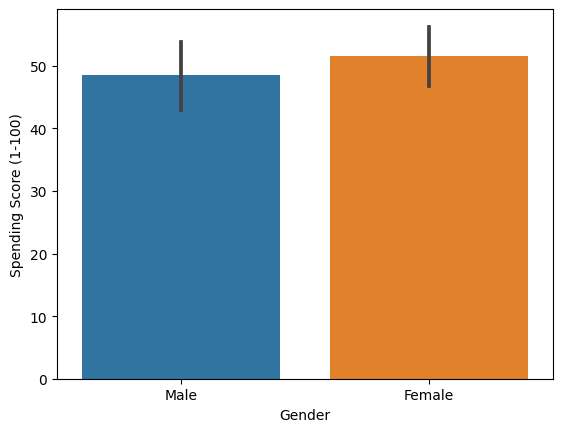

In [ ]:
sns.barplot(x="Gender", y="Spending Score (1-100)", data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

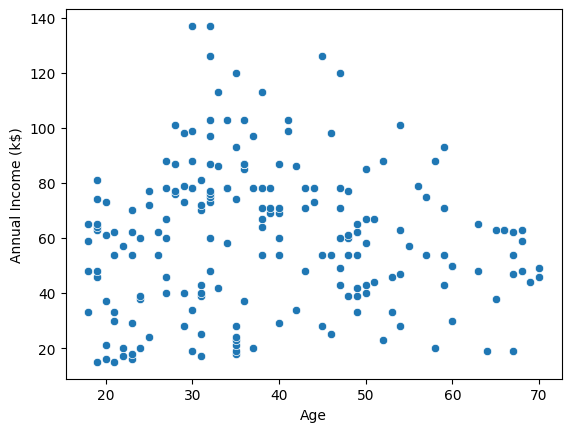

In [ ]:
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

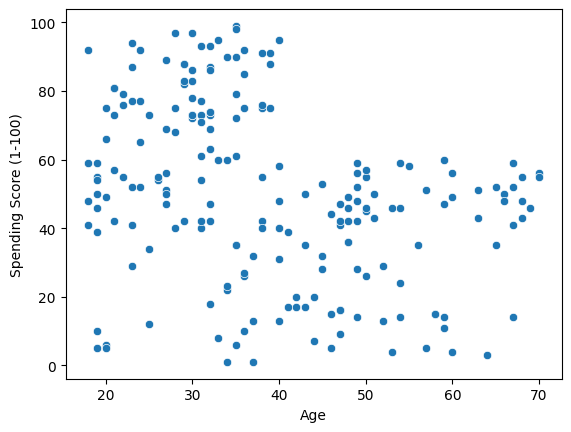

In [ ]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

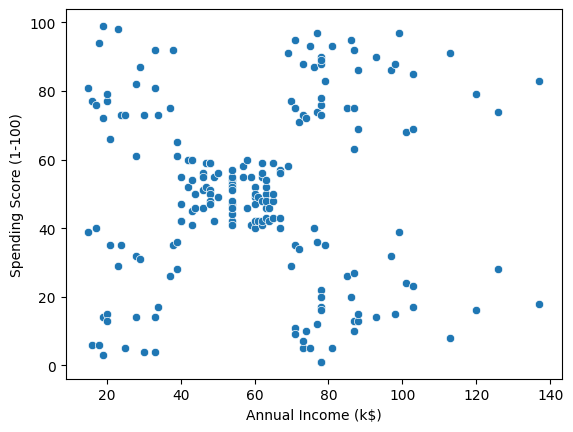

In [ ]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

- 그래프들로 알 수 있는 것
    - 특정 피쳐를 종속 변수로 두고 나머지 피쳐를 독립 변수로 두고 분석하기에는 서로 뚜렷한 관계를 가진 것처럼 보이는 피쳐들이 보이지 않음. 고로 군집 분석이 필요함.

## 주요 코드 미리보기
---

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = df.iloc[:, 3:]
sc = StandardScaler()
X = sc.fit_transform(X)

model = KMeans(n_clusters=2, random_state=42)                               # 200개의 서로 다른 인스턴스를 2개의 그룹(k = 2)으로 묶는다.
y_preds = model.fit_predict(X)
df["cluster"] = y_preds

print("Silhouette score: {0:.4f}".format(silhouette_score(X, y_preds)))     # 점수가 그렇게 높지 않다 => 군집 결과가 그닥 만족스럽지 않다. => k 값이 적절치 못하다.

Silhouette score: 0.3147


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

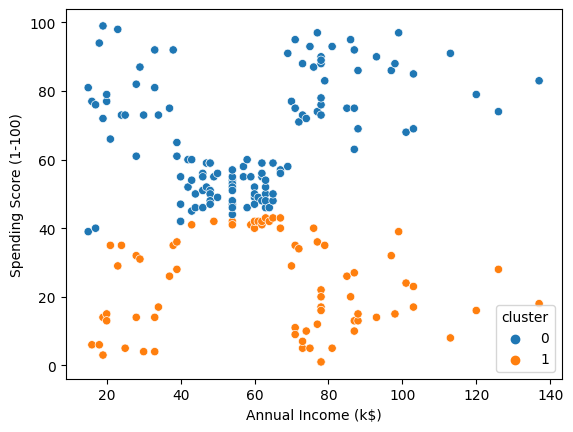

In [ ]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="cluster")

## 코드 구현
---
앞서 시도해본 k 값이 그닥 높지 못한 실루엣 점수를 얻었기 때문에 더 좋은 점수를 가진 k 값을 알아내기 위한 코드를 구현한다.

In [ ]:
silhouette_avg = []
for k in range(2,12):
    model = KMeans(n_clusters=k, random_state=42)
    y_preds = model.fit_predict(X)
    score = silhouette_score(X, y_preds)
    silhouette_avg.append(score)
    print("K = {0}, Silhouette Score = {1:.4f}".format(k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K = 2, Silhouette Score = 0.3147
K = 3, Silhouette Score = 0.4666
K = 4, Silhouette Score = 0.4939
K = 5, Silhouette Score = 0.5547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K = 6, Silhouette Score = 0.5399
K = 7, Silhouette Score = 0.5263


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K = 8, Silhouette Score = 0.4558
K = 9, Silhouette Score = 0.4553
K = 10, Silhouette Score = 0.4476
K = 11, Silhouette Score = 0.4385


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


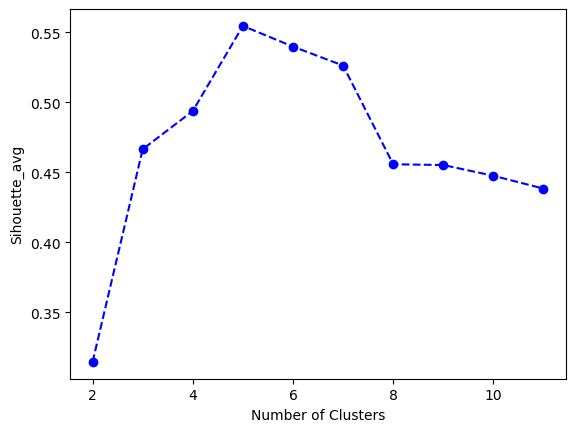

The greatest silhouette score appears when k = 5


In [ ]:
plt.plot(range(2, 12), silhouette_avg, "bo--")
plt.xlabel("Number of Clusters")
plt.ylabel("Sihouette_avg")
plt.show()
print("The greatest silhouette score appears when k = 5")

In [ ]:
model = KMeans(n_clusters=5, random_state=42)
y_preds = model.fit_predict(X)
df["clusters"] = y_preds

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

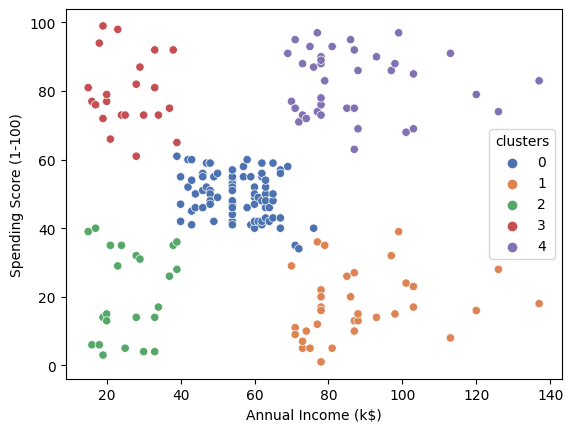

In [ ]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="clusters", palette="deep")

클러스터별 특징 </br>
- 0 : 적당한 연소득과 적당한 소비를 하는 그룹
- 1 : 높은 연소득에 비해 소비가 적은 그룹
- 2 : 낮은 연소득과 적은 소비를 하는 그룹
- 3 : 낮은 연소득에 비해 소비가 많은 그룹
- 4 : 높은 연소득과 많은 소비를 하는 그룹

이러한 결과를 사용하여 고객의 연소득과 소비에 따라 마켓팅 전략이나 표시하게 할 광고 등을 선정할 수 있음.

<Axes: xlabel='clusters', ylabel='Spending Score (1-100)'>

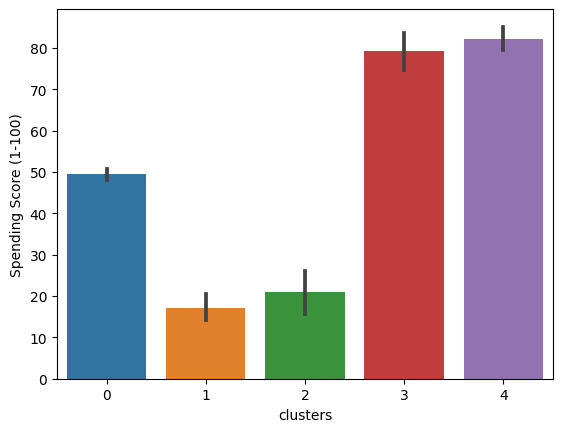

In [ ]:
sns.barplot(x="clusters", y="Spending Score (1-100)", data=df)

<Axes: xlabel='clusters', ylabel='Annual Income (k$)'>

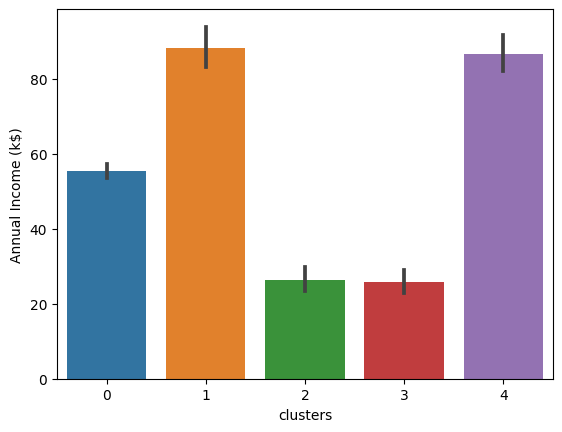

In [ ]:
sns.barplot(x="clusters", y="Annual Income (k$)", data=df)

<Axes: xlabel='clusters', ylabel='count'>

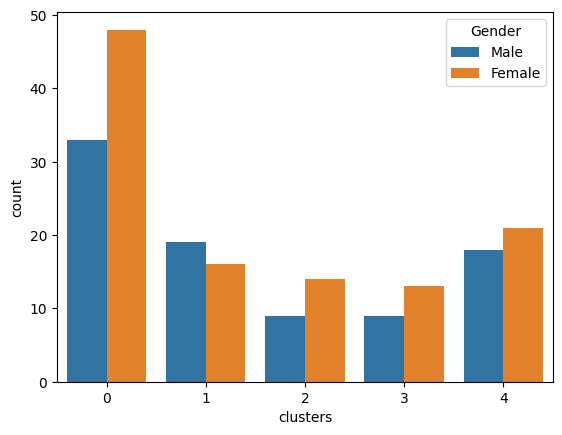

In [ ]:
sns.countplot(x="clusters", data=df, hue="Gender")

<Axes: xlabel='clusters', ylabel='Age'>

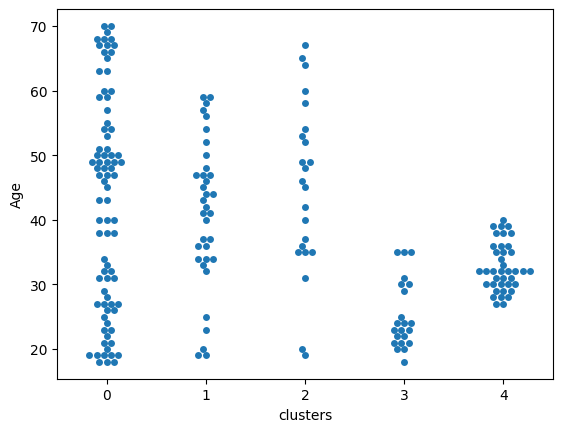

In [ ]:
sns.swarmplot(x="clusters", y="Age", data=df)

위와 같은 플롯들로 각 클러스터의 특징을 잘 나타내는 적절한 이름을 부여해 줄 수 있음

# 인공신경망 구성하기(1)

## 실습 목표
---
- Pytorch의 주요 기능 이해
- 주어진 데이터 셋을 활용하여 인공신경망 설계
- 인공신경망 학습 과정을 코드로 작성하고 학습이 완료된 모델 생성

## 문제 정의
---
Multiclass classifier

## 주요 코드

1. TensorDataset와 DataLoader
- 입력 데이터를 쉽게 처리하고, Batch 단위로 잘라서 학습할 수 있게 도와주는 모듈
- Dataset: 학습시 사용하는 feature와 target의 pair로 이루어짐
    - 아래의 코드에서는 TensorDataset을 사용하여 Dataset 인스턴스를 생성했지만, 이미지를 사례와 같이 Dataset 클래스를 상속받아서 커스텀 인스턴스를 생성하는 형태로 많이 사용
- DataLoader: 학습 시, 각 인스턴스에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)를 생성


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# X, y로 분할한 데이터를 tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [ ]:
# tensor를 TensorDataset으로 생성 - X와 y가 짝으로 이루어짐
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [ ]:
# DataLoader 형태로 생성
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=True)

2. Device 설정
- 일반적으로 인공신경망의 학습은 GPU를 사용하는 것이 바람직함
    - Colab 런타임 설정 변경
- GPU를 사용하여 학습을 진행하도록 명시적으로 작성 필요
- 연산 유형에 따라 GPU에서 수행이 불가능한 경우도 존재하는데, 그럴 경우도 마찬가지로 명시적으로 어떤 프로세서에서 연산을 수행해야 하는지 코드로 작성해야 함.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = NeuralNetwork().to(device)

3. 신경망 생성
- torch.nn 패키지는 신경망 생성 및 학습 시 설정해야하는 다양한 기능을 제공

In [ ]:
import torch.nn as nn

- 신경망을 nn.Module을 상속받아 정의하고, 아래 두 메소드를 정의해야 함.
    - ```__init__()```: 신경망에서 사용할 layer를 초기화하는 부분
    - ```forward()```: feed forward 연산 수행 시, 각 layer의 입출력이 어떻게 연결되는지를 지정

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(4, 16)         # self. 뒤에 나오는 것은 그냥 레이어의 이름. - 4개의 노드, 16개의 출력 노드를 가지는 레이어
        self.hidden_layer1 = nn.Linear(16, 32)
        self.output_layer = nn.Linear(32, 3)
        self.relu = nn.ReLU()                       # 활성화 함수 - ReLU

    def forward(self, x):
        out = self.relu(self.input_layer(x))        # 4  --ReLU--> 16개
        out = self.relu(self.hidden_layer1(out))    # 16 --ReLU--> 32개
        out = self.output_layer(out)                # 32 --ReLU--> 3개
        return out

4. Model Compile
- 학습 시 필요한 정보들(Loss function, Optimizer) 선언
- 일반적으로 loss와 optimizer는 아래와 같이 변수로 선언하고, 변수를 train/test 시 참고할 수 있도록 매개변수로 지정


In [ ]:
learning_rate = 0.01
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

5. Train
- 신경망의 학습과정을 별도의 함수로 구성하는 것이 일반적
    - feed forward -> loss -> error back propagation -> (log) -> (반복)

In [ ]:
def train_loop(train_loader, model, loss_fn, optimizer):
    # train_loader : 학습할 때 필요한 데이터셋을 담아둔 데이터 로더
    # model : 신경망 모델
    # loss_fn : 비용함수
    # optimizer : 아담으로 정해놨던 부분
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)                     # feed forward
        loss = loss_fn(pred, y)             # loss
        optimizer.zero_grad()               # optimizer 사용해서 초기화
        loss.backward()                     # loss 역전파
        optimizer.step()                    # 아담 옵티마이저 최적화

6. Test
- 학습 과정과 비슷하지만 역전파 과정이 빠짐
    - feed forward -> loss -> (log) -> (반복)

In [ ]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():                                                   # Gradient 연산 안 한다.
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # 주어진 문제가 분류인 상황이라 예측값과 실제값의 대조 결과를 담아줌

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

7. Iteration
- 신경망 학습은 여러 epochs을 반복해서 수행하면서 모델을 구성하는 최적의 파라미터를 찾음
- 지정한 epochs 수만큼 학습 과정과 평가 과정을 반복하면서 모델의 성능(loss, accuracy 등)을 체크

In [ ]:
epochs = 10
for i in range(epochs):
    print(f"Epoch {i+1} \n ---------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done")

# Basic Neural Network
iris dataset을 사용하여 품종을 구분하는 분류기를 신경망을 사용하여 구현

## [Step1] Load libraries & Datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# importing data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["label"] = iris.target

# split data
df.head()
y = df["label"]
X = df.drop(["label"], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=42, stratify=y)

## [Step2] Create DataLoader

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=True)

<ipython-input-10-3f5bf07e47ed>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-10-3f5bf07e47ed>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-10-3f5bf07e47ed>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.int64)
<ipython-input-10-3f5bf07e47ed>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceT

## [Step3] Set Network Structure

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(4, 16)
        self.hidden_layer1 = nn.Linear(16, 32)
        self.output_layer = nn.Linear(32, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.input_layer(x))
        out = self.relu(self.hidden_layer1(out))
        out = self.output_layer(out)
        return out

## [Step4] Create Model instance

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"The current device is : {device}")

model = NeuralNetwork().to(device)

The current device is : cuda


## [Step5] Mobile compile

In [ ]:
learning_rate = 0.001
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## [Step6] Set train loop

In [ ]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)

        # 손실 계산
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f} [{current:>5d}]/{size:5d}")

## [Step7] Set test loop

In [ ]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error : \n Accuracy : {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

## [Step8] Run model

In [ ]:
epochs = 10

for i in range(epochs):
    print(f"Epoch {i+1} \n-------------------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done")

Epoch 1 
-------------------------------------
loss: 0.287859 [    0]/  112
loss: 0.322583 [   10]/  112
loss: 0.313287 [   20]/  112
loss: 0.255083 [   30]/  112
loss: 0.135042 [   40]/  112
loss: 0.321999 [   50]/  112
loss: 0.259046 [   60]/  112
loss: 0.342414 [   70]/  112
loss: 0.384772 [   80]/  112
loss: 0.271886 [   90]/  112
loss: 0.278610 [  100]/  112
loss: 0.283924 [   22]/  112
Test Error : 
 Accuracy : 100.0%, Avg loss: 0.307099

Epoch 2 
-------------------------------------
loss: 0.227911 [    0]/  112
loss: 0.299731 [   10]/  112
loss: 0.267566 [   20]/  112
loss: 0.304035 [   30]/  112
loss: 0.200206 [   40]/  112
loss: 0.347450 [   50]/  112
loss: 0.177852 [   60]/  112
loss: 0.358790 [   70]/  112
loss: 0.151715 [   80]/  112
loss: 0.337426 [   90]/  112
loss: 0.252512 [  100]/  112
loss: 0.223215 [   22]/  112
Test Error : 
 Accuracy : 97.4%, Avg loss: 0.288972

Epoch 3 
-------------------------------------
loss: 0.206267 [    0]/  112
loss: 0.313104 [   10]/  11

# 인공신경망 구성하기(2)

## 실습 목표
---
- torchvision 데이터 셋을 사용하여 이미지 분류기를 생성한다.
- 생성한 모델을 저장하고, 저장된 모델을 다시 불러와서 사용한다.

## 문제 정의
---
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성한다.
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST)
- references
    - https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
    - https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

## 주요 코드
---

### Fashion MNIST Classifier
---
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현한다.

#### [Step1] Load Libraries & Datasets
- ```torch.nn``` : 신경망을 생성하기 위한 기본 재료들을 제공(Modules, Sequential, Layer, Activations, Loss, Dropout)
- ```torchvision.datasets``` : torchvision.transforms를 사용해 변형이 가능한 형태, feature와 label을 반환
- ```torchvision.transforms``` :
    - ```ToTensor()``` : ndarray를 FloatTensor로 변환하고 이미지 픽셀 크기를 [0., 1.] 범위로 조정(scale)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
print(datasets.FashionMNIST)

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [ ]:
# Import Fashion MNIST data
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()              # 각각의 값을 텐서 형태로 바꿔라
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12589539.38it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 199332.55it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3702533.20it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10296746.30it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#### [Step2] Create DataLoader

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current device is : {device}")

Current device is : cpu


### EDA

In [ ]:
print(training_data, "\n---------------------\n", test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 
---------------------
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
 # 각 튜플은 1 채널 x 28 x 28 사이즈의 이미지와 레이블 값을 담고 있다.
training_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


label=9


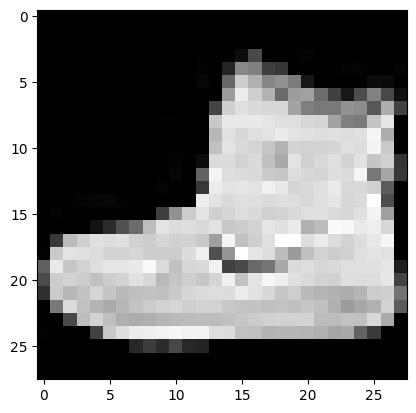

In [ ]:
img, label = training_data[0]
plt.imshow(img.squeeze(), cmap="gray")      # 각 차원에서 1인 차원은 없애는 과정(squeeze)
print(f"label={label}")

In [ ]:
# Fashion MNIST의 레이블 값
labels_map = {
    0 : "T-Shirt",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle Boot",
}

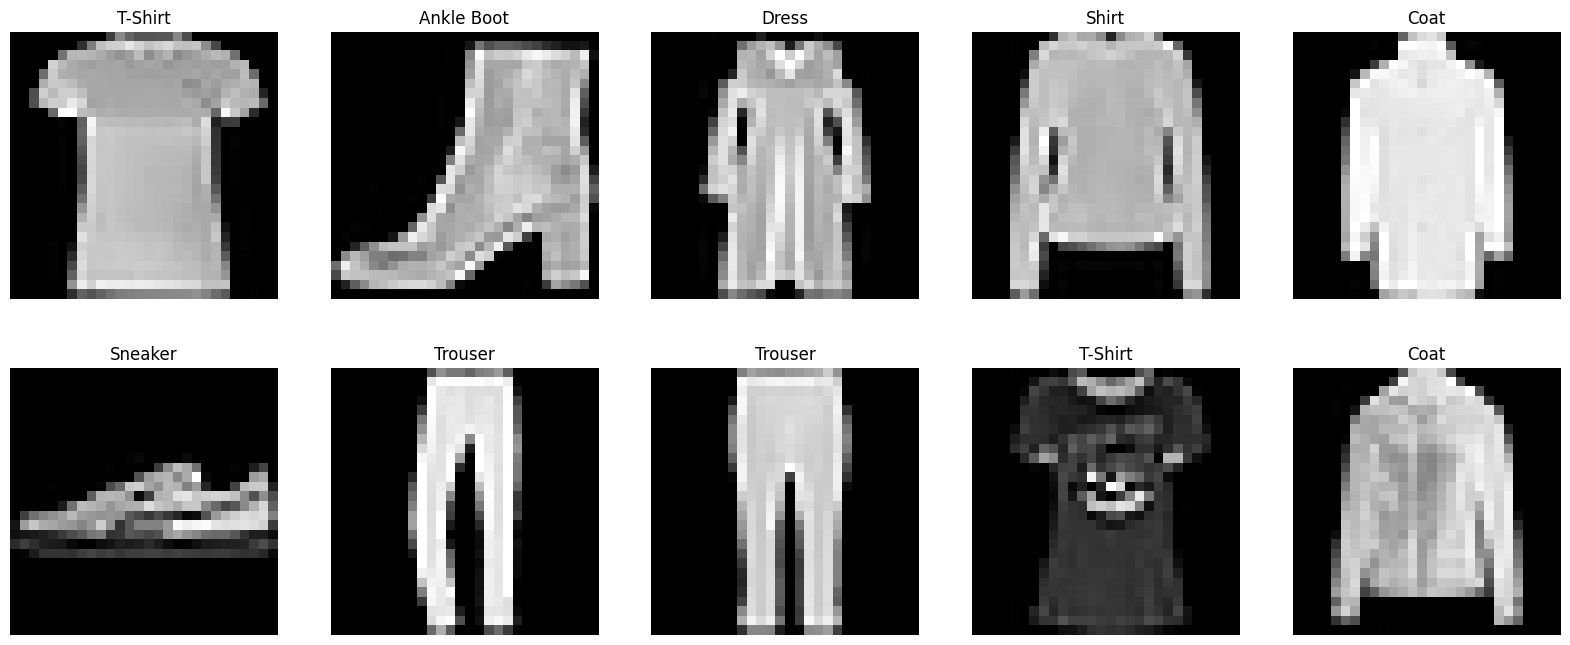

In [ ]:
figure = plt.figure(figsize = (20, 8))
cols, rows = 5, 2

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### [Step3] Set Network Structure

In [ ]:
class NeuNet(nn.Module):
    def __init__(self):
        super(NeuNet, self).__init__()
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        output = self.classifier(x)
        return output

#### [Step4] Create Model Instance

In [ ]:
model = NeuNet().to(device)
print(model)

NeuNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


#### Model 테스트
---
간단하게 Feed forward를 잘 수행하는지 검사하기 위해
- 왜?
    - 복잡한 신경망 구성 시, 입력, 히든, 출력 층 등에서 노드 수가 맞지 않아 에러가 나는 경우가 있음. 그래서 본격적인 학습을 들어가기 전에 체크해보기 위해 하는 테스트임.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
output = model(X)
print(f"Model Output : {output}\n")
pred_probab = nn.Softmax(dim=1)(output)
print(f"Softmax Result : {pred_probab}\n")
y_pred = pred_probab.argmax()
print(y_pred)

Model Output : tensor([[ 0.0522, -0.0828,  0.0519,  0.0086, -0.0729, -0.1142, -0.1698, -0.0624,
          0.1169, -0.2734]], device='cuda:0', grad_fn=<AddmmBackward0>)

Softmax Result : tensor([[0.1106, 0.0966, 0.1106, 0.1059, 0.0976, 0.0936, 0.0886, 0.0986, 0.1180,
         0.0799]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

tensor(8, device='cuda:0')


#### [Step5] Model Compile

In [ ]:
loss = nn.CrossEntropyLoss()
learning_rate = 1e-3 # 0.001
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### [Step6] Set train loop

In [ ]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)

        loss = loss_fn(pred, y)

        opt.zero_grad()
        loss.backward()
        opt.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss : {loss:>7f} [{current:>5d}]/{size:5d}")

#### [Step7] Set test loop

In [ ]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error : \n Accuracy : {(100*correct):>0.1f}%, Avg loss : {test_loss:8f}\n")

#### [Step8] Run Model

In [ ]:
epochs = 10

for i in range(epochs):
    print(f"Epoch {i+1} \n-------------------------------------")
    train_loop(train_dataloader, model, loss, opt)
    test_loop(test_dataloader, model, loss)
print("Done")

Epoch 1 
-------------------------------------
loss : 2.284793 [    0]/60000
loss : 0.684689 [ 6400]/60000
loss : 0.721738 [12800]/60000
loss : 0.620582 [19200]/60000
loss : 0.438857 [25600]/60000
loss : 0.426800 [32000]/60000
loss : 0.452684 [38400]/60000
loss : 0.494568 [44800]/60000
loss : 0.392910 [51200]/60000
loss : 0.582813 [57600]/60000
Test Error : 
 Accuracy : 83.2%, Avg loss : 0.468615

Epoch 2 
-------------------------------------
loss : 0.496072 [    0]/60000
loss : 0.424279 [ 6400]/60000
loss : 0.589727 [12800]/60000
loss : 0.315216 [19200]/60000
loss : 0.608764 [25600]/60000
loss : 0.344129 [32000]/60000
loss : 0.377006 [38400]/60000
loss : 0.615848 [44800]/60000
loss : 0.357567 [51200]/60000
loss : 0.335992 [57600]/60000
Test Error : 
 Accuracy : 85.2%, Avg loss : 0.418454

Epoch 3 
-------------------------------------
loss : 0.341110 [    0]/60000
loss : 0.369090 [ 6400]/60000
loss : 0.276091 [12800]/60000
loss : 0.320380 [19200]/60000
loss : 0.278519 [25600]/60000
l

#### [Step9] Save & Load Model
---
학습이 끝난 모델을 배포하기 위해 파라미터 값이나 세팅을 저장하는 과정. 두가지가 있음
1. 뼈대는 놔두고 parameter만 저장하고 불러오는 방법(값 only)
2. 모델 전체를 저장하고 불러오는 방법(뼈대와 값)

##### 1. Parameter만 저장하고 불러오기

In [ ]:
torch.save(model.state_dict(), "model_weights.pth")

In [ ]:
model2 = NeuNet().to(device)
print(model2)

NeuNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
model2.load_state_dict(torch.load("model_weights.pth"))

<All keys matched successfully>

In [ ]:
model2.eval()
test_loop(test_dataloader, model2, loss)

Test Error : 
 Accuracy : 88.1%, Avg loss : 0.332285



##### Model 전체를 저장하고 불러오기

In [ ]:
torch.save(model, "model.pth")

In [ ]:
model3 = torch.load("model.pth")

In [ ]:
model3.eval()
test_loop(test_dataloader, model3, loss)

Test Error : 
 Accuracy : 88.1%, Avg loss : 0.332285



# Convolution Neural Network
---


## 살습 목표
---
- CNN을 구성하는 주요 연산을 이해하고 신경망 설계
- AlexNet을 사용하여 이미지를 학습하고 10개의 카테고리를 갖는 이미지를 분류하는 이미지 분류기 생성(데이터: CIFAR)
- 이미지 증강을 수행하여 모델의 성능을 높이는 방법을 이해한다.
- Confusion Matrix를 생성하여 분류 정확도를 확인한다.
- Reference
    - https://tutorials.pytorch.kr/beginner/buildmodel_tutorial.html
    - https://tutorials.pytorch.kr/beginner/data_tutorial.html
    - https://medium.com/@djin31/how-to-plot-wholesome-confusion-matrix-40134fd402a8

## 문제 정의
---
- AlexNet(2012, ILSVRC)
- Methods to use
    1. ```nn.Conv2d()```
    - ```in_channels``` : input channel
    - ```out_channels``` : output channel
    - ```kernel_size``` : size of kernel
    - ```stride=1``` : stride
    - ```padding=0``` : padding
    2. ```nn.MaxPool2d()```
    - ```kernel_size``` :
    - ```stride=None``` :
    - ```padding=0``` :
    3. ```tensor.view()``` : np.reshape과 같음
    - ```reshape```


## AlexNet code 미리보기([구조](https://en.wikipedia.org/wiki/AlexNet))

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, padding=1),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.classifier = nn.Sequential(
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

4. 이미지 증강(Data(image) Augmentation)


In [ ]:
mean = train_img.data.mean(axis=(0,1,2)) / 255
std = test_img.data.std(axis=(0,1,2)) / 255
print(f"평균 : {mean}, 표준편차 : {std}")

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
    transforms.RandomCrop(size=train_img.data.shape[1], padding=4),
    transforms.RandomHorizontalFlip()
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

5. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

## CIFAR Classifier(AlexNet)
---
CIFAR 데이터셋을 사용하여 이미지에 포함된 object가 무엇인지 분류하는 이미지 분류기를 생성.

### [Step1] Load Libraries & Datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets

from torchvision.transforms import transforms
from torchvision.transforms.functional import to_pil_image

In [ ]:
# Importing CIFAR data
train_img = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_img = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 170498071/170498071 [00:03<00:00, 48332933.30it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
print(train_img.data.shape)
print("---------------")
print(train_img.data.mean())
print("---------------")
print(train_img.data.mean(axis=0).shape)
print(train_img.data.mean(axis=1).shape)
print(train_img.data.mean(axis=2).shape)


(50000, 32, 32, 3)
---------------
120.70756512369792
---------------
(32, 32, 3)
(50000, 32, 3)
(50000, 32, 3)


### [Step2] Data Preprocessing
불러온 이미지의 증강을 통해 학습 정확도 향상
- RandomCrop
- RandomHorizontalFlip
- Normalize

In [ ]:
mean = train_img.data.mean(axis=(0,1,2)) / 255
std = train_img.data.std(axis=(0,1,2)) / 255
print(f"평균 = {mean}, 표준편차 = {std}")

평균 = [0.49139968 0.48215841 0.44653091], 표준편차 = [0.24703223 0.24348513 0.26158784]


In [ ]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
    transforms.RandomCrop(size=train_img.data.shape[1], padding=4),         # 변형된 이미지들은 학습용이기 때문에 테스트 데이터까지 적용시키면 안됨.
    transforms.RandomHorizontalFlip()
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [ ]:
train_img2 = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform_train
)

test_img2 = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform_test
)

Files already downloaded and verified
Files already downloaded and verified


### [Step3] Set Hyperparameters



In [ ]:
EPOCH = 10
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current runtime is : {DEVICE}")

Current runtime is : cuda


### [Step4] Create DataLoader

In [ ]:
# DataLaoder 만들기
train_loader = DataLoader(train_img2, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_img2, batch_size=BATCH_SIZE, shuffle=False)


### EDA

In [ ]:
print(train_img, "\n------------------------\n", test_img)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 
------------------------
 Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape : {train_labels.size()}")

Feature batch shape : torch.Size([128, 3, 32, 32])
Labels batch shape : torch.Size([128])


In [ ]:
labels_map = {
    0: "plane",
    1: "car",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

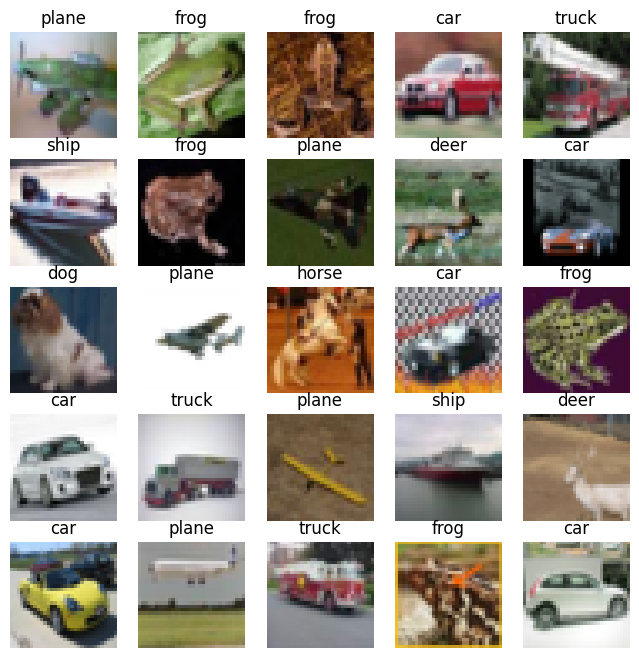

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_img), size=(1, )).item()
    img, label = train_img[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(to_pil_image(img))
plt.show()

### [Step5] Set Network Structure

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, padding=1),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.classifier = nn.Sequential(
            nn.Linear(256, 4096),
            nn.Dropout(0.5),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

### [Step6] Create model Instance


In [ ]:
model = AlexNet().to(DEVICE)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(5, 5))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=3, padding=1, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=256, out_features=4096, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU(inplace=True)
    (3): Linear(in_featur

### [Step7] Model Compile

In [ ]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

### [Step8] Set Train Loop

In [ ]:
def train(train_loader, model, loss_fn, optimizer):
    model.train()

    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(DEVICE), y.to(DEVICE)
        pred = model(X)

        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"Loss : {loss:>7f} [{current:>5d}]/{size:5d}")

### [Step9] Set Test Loop

In [ ]:
def test(test_laoder, model, loss_fn):
    model.eval()

    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

### [Step10] Run Model

In [ ]:
for i in range(EPOCH):
    print(f"Epoch {i+1} \n----------------------------------------------")
    train(train_loader, model, loss, opt)
    test(test_loader, model, loss)
print("Done")

Epoch 1 
----------------------------------------------
Loss : 2.303205 [    0]/50000
Loss : 1.906262 [12800]/50000
Loss : 1.796745 [25600]/50000
Loss : 1.809838 [38400]/50000
Test Error: 
 Accuracy: 36.6%, Avg loss: 1.629363

Epoch 2 
----------------------------------------------
Loss : 1.683165 [    0]/50000
Loss : 1.635365 [12800]/50000
Loss : 1.558968 [25600]/50000
Loss : 1.406868 [38400]/50000
Test Error: 
 Accuracy: 47.4%, Avg loss: 1.403416

Epoch 3 
----------------------------------------------
Loss : 1.444822 [    0]/50000
Loss : 1.300643 [12800]/50000
Loss : 1.542637 [25600]/50000
Loss : 1.273656 [38400]/50000
Test Error: 
 Accuracy: 49.7%, Avg loss: 1.402570

Epoch 4 
----------------------------------------------
Loss : 1.347477 [    0]/50000
Loss : 1.469802 [12800]/50000
Loss : 1.281309 [25600]/50000
Loss : 1.288010 [38400]/50000
Test Error: 
 Accuracy: 52.8%, Avg loss: 1.294188

Epoch 5 
----------------------------------------------
Loss : 1.275384 [    0]/50000
Loss :

### [Step11] Confusion Matrix

In [ ]:
import itertools
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title="Confusion matrix"):
    accu = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accu

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted label \naccuracy={:0.4f}; \ misclass={:0.4f}".format(accu, misclass))
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

model.eval()
ylabel = []
ypred_label = []

for batch_idx, (inputs, targets) in enumerate(test_loader):
    inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
    outputs = model(inputs)
    _, predicted = outputs.max(1)
    ylabel = np.concatenate((ylabel, targets.cpu().numpy()))
    ypred_label = np.concatenate((ypred_label, predicted.cpu().numpy()))

cnf_matrix = confusion_matrix(ylabel, ypred_label)
print(cnf_matrix)
print(np.trace(cnf_matrix))

[[664  25  69  25  26   5   6  12 147  21]
 [ 18 770  10  25  14   5   4   5  60  89]
 [ 69  20 436 123 155  73  53  35  26  10]
 [ 10  16  62 597  87 123  38  27  23  17]
 [ 30   4  73  99 616  25  48  81  19   5]
 [  5   7  65 392  55 390  14  49  15   8]
 [  4  22  59 155 112  37 582  10   9  10]
 [ 17   8  25  92 101  91   5 635   7  19]
 [ 46  42  10  36  11   2   3   1 834  15]
 [ 22 209  10  42  17   4   5  20  97 574]]
6098


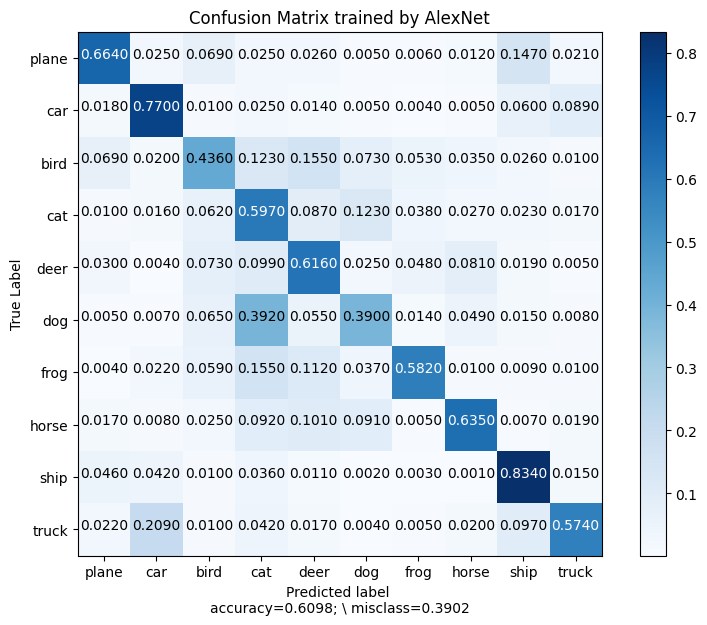

In [ ]:
plot_confusion_matrix(cnf_matrix, target_names=labels_map.values(),
                      title="Confusion Matrix trained by AlexNet")

# VGGNet

## 실습 목표
---
- VGGNet을 사용하여 이미지를 학습하고 10개의 카테고리를 갖는 이미지를 분류하는 이미지 분류기를 생성한다.(데이터: CIFAR)
- Pre-training 모델의 사용 방법을 이해한다.

## 문제 정의
---
- VGGNet
- Configuration을 이용하여 모델 생성

## 주요 코드
---

1. VGGNet


In [ ]:
# Model
cfg = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "VGG19": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
}

class VGG(nn.Module):
    def __init__(self, vgg_name):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 360),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(360, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1) # <= flatten
        out = self.classifier(out)
        return out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == "M":
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
        return nn.Sequential(*layers)

2. Pretrained model

In [ ]:
from torchvision import models
vgg16 = models.vgg16(pretrained=True)
vgg16.to(DEVICE)

loss = nn.CrossEntropyLoss()
opt = torch.Optim.SGD(vgg16.classifier.parameters(), lr = LEARNING_RATE, momentum=0.9)

## CIFAR Classifier(VGGNet)
---
CIFAR 데이터셋을 사용하여 이미지에 포함된 object가 무엇인지 분류하는 이미지 분류기 생성

### [Step1] Load Libraries & DataSets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from torchvision import datasets
from torchvision.transforms import transforms
from torchvision.transforms.functional import to_pil_image

### [Step2] Data Preprocessing
불러온 이미지를 증강시켜 학습 정확도를 향상시킴
- RandomCrop
- RandomHorizontalFlip
- Normalize

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
])

train_img = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_img = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 170498071/170498071 [00:04<00:00, 34334679.19it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### [Step3] Set Hyperparameters

In [ ]:
EPOCHS = 10
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Current runtime device is :", DEVICE)

Current runtime device is : cpu


### [Step4] Create DataLoader

In [ ]:
train_loader = DataLoader(train_img, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_img, batch_size=BATCH_SIZE, shuffle=False)

### [Step5] Set Network Structure

In [ ]:
# Model
cfg = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "VGG19": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
}

class VGG(nn.Module):
    def __init__(self, vgg_name):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 360),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(360, 100),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1) # <= flatten
        out = self.classifier(out)
        return out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == "M":
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
        return nn.Sequential(*layers)

### [Step6] Create Model Instance

In [ ]:
model = VGG("VGG16").to(DEVICE)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

### [Step7] Model Compile

In [ ]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

### [Step8] Set Train Loop

In [ ]:
def train(train_loader, model, loss_fn, optimizer):
    model.train()

    size = len(train_loader.dataset)

    for batch, (X,y) in enumerate(train_loader):
        X, y = X.to(DEVICE), y.to(DEVICE)
        pred = model(X)

        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}]/{size:5d}")

### [Step9] Set Test Loop

In [ ]:
def test(test_loader, model, loss_fn):
    model.eval()

    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

### [Step10] Run Model

In [ ]:
for i in range(EPOCHS):
    print(f"Epoch {i+1} \n---------------------------------")
    train(train_loader, model, loss, opt)
    test(test_loader, model, loss)
print("DOne")

Epoch 1 
---------------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


loss: 2.357679 [    0]/50000


## CIFAR(Pretrained VGGNet)
---
ImageNet 데이터로 학습한 VGGNet을 사용하여 주어진 데이터셋에서 사용할 수 있도록 Fine tuning 해본다.

In [ ]:
from torchvision import models

vgg16 = models.vgg16(pretrained=True)
vgg16.to(DEVICE)
print(vgg16)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:10<00:00, 53.5MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg16.classifier[6].out_features = 10

for param in vgg16.features.parameters():
    param.requires_grad = False

In [ ]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.SGD(vgg16.classifier.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [ ]:
for i in range(EPOCHS):
    print(f"Epoch {i+1} \n----------------------------------")
    train(train_loader, vgg16, loss, opt)
    test(test_loader, vgg16, loss)
print("Done")

Epoch 1 
----------------------------------


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


loss: 13.019297 [    0]/50000
loss: 1.101391 [ 3200]/50000
loss: 0.986649 [ 6400]/50000
loss: 0.687804 [ 9600]/50000


# 결과
pretrained model의 정확도가 수동으로 만든 model의 정확도보다 높다.

# Variational Autoencoder

## 실습 목표
---
- VAE를 설계하고 학습시켜 이미지를 생성하는 모델을 생성한다.(데이터: MNIST)


## 문제 정의
- VAE

## [Step1] Load Libraries and Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch.nn as nn
import torch.nn.functional as F
import torch

In [ ]:
train_images = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_images = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 148646601.63it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 108641877.87it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28907997.04it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19948197.66it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## [Step2] Set hyperparameters

In [ ]:
EPOCHS = 10
BATCH_SIZE = 10
LEARNING_RATE = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using Device:", DEVICE)

Using Device: cuda


## [Step3] Create DataLoader

In [ ]:
train_loader = DataLoader(train_images, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_images, batch_size=BATCH_SIZE, shuffle=False)

## [Step4] Set Network Structure([구조](https://en.wikipedia.org/wiki/Variational_autoencoder))

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.flatten = nn.Flatten()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_var = nn.Linear(256, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid()
        )

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        var = self.fc_var(result)
        return mu, var

    def decode(self, z):
        result = self.decoder(z)
        return result

    def reparameterize(self, mu, var):
        std = torch.exp(var / 2)
        eps = torch.randn_like(std)
        return mu + (eps * std)

    def forward(self, x):
        x = self.flatten(x)
        mu, var = self.encode(x)
        z = self.reparameterize(mu, var)
        out = self.decode(z)
        return out, mu, var

## [Step5] Create Model Instance

In [ ]:
model = VAE(10).to(DEVICE)  # VAE를 만드는데에 10개의 잠재 벡터 사용
print(model)

VAE(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Linear(in_features=256, out_features=10, bias=True)
  (fc_var): Linear(in_features=256, out_features=10, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


## [Step6] Model Compile


In [ ]:
def loss_function(recon_x, x, mu, var):
    recon_loss = F.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction="sum")
    kl_loss = -.5 * torch.sum(1 + var - mu.pow(2) - var.exp())
    return recon_loss + kl_loss

opt = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

## [Step7] Set Train Loop

In [ ]:
def train(train_loader, model, loss_fn, optimizer):
    model.train()

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(DEVICE), y.to(DEVICE)
        decoded, mu, var = model(X)

        loss = loss_fn(decoded, X, mu, var)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    origin_data = X[:5].view(-1, 28*28).type(torch.FloatTensor) / 255.
    decoded_data = decoded[:5].view(-1, 28*28).type(torch.FloatTensor) / 255.

    f, axs = plt.subplots(2, 5, figsize=(5, 2))
    for i in range(5):
        img = np.reshape(origin_data.data.numpy()[i], (28, 28))
        axs[0][i].imshow(img, cmap="gray")
        axs[0][i].set_xticks(())
        axs[0][i].set_yticks(())

    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
        axs[1][i].imshow(img, cmap="gray")
        axs[1][i].set_xticks(())
        axs[1][i].set_yticks(())
    plt.show()

## [Step8] Run Model

Epoch 1 
----------------------------------------------------


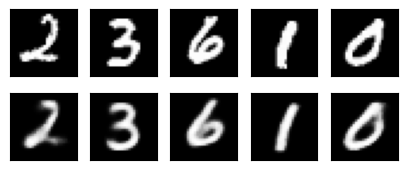

Epoch 2 
----------------------------------------------------


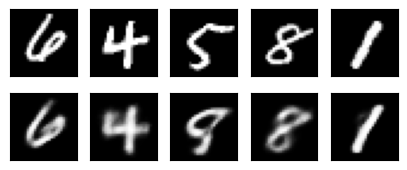

Epoch 3 
----------------------------------------------------


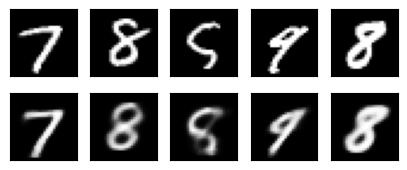

Epoch 4 
----------------------------------------------------


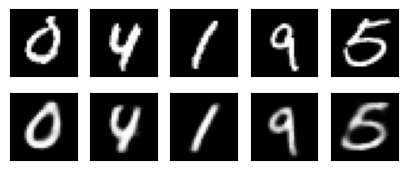

Epoch 5 
----------------------------------------------------


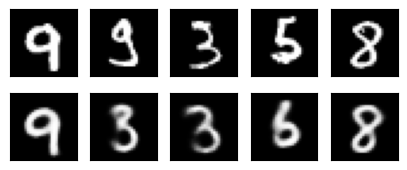

Epoch 6 
----------------------------------------------------


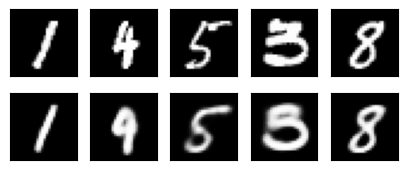

Epoch 7 
----------------------------------------------------


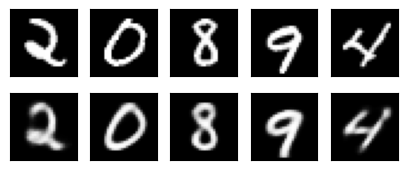

Epoch 8 
----------------------------------------------------


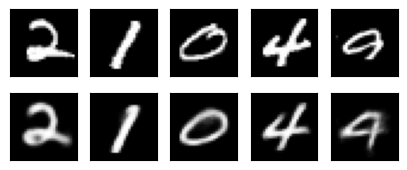

Epoch 9 
----------------------------------------------------


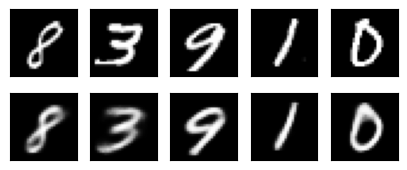

Epoch 10 
----------------------------------------------------


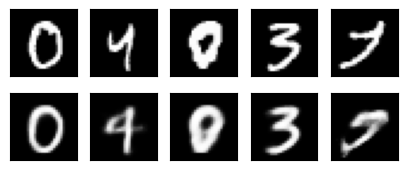

In [ ]:
for i in range(EPOCHS):
    print(f"Epoch {i+1} \n----------------------------------------------------")
    train(train_loader, model, loss_function, opt)

# IMDB Movie Review Analysis - 감정 분석

## 실습 목표
---
- 자연어 처리를 위한 주요 신경망의 사용법 이해
- 영화 리뷰평 긍정/부정을 판단하기 위한 분류 모델 생성
- 데이터: imdb 전처리 완료 데이터


## 문제 정의
---
- Binary Classification(Positive/Negative)

## 주요 코드
---


1. RNN의 유형
- One to One
- One to Many
- Many to One
    - 영화 리뷰 텍스트(Many)를 입력으로 받아 긍정/부정(one)을 출력하는 구조
    - Embedding: 영화 리뷰(text)를 벡터로 변환하는 연산
    - LSTM: 시계열 데이터 처리 구조
    - Linear: 결과 출력
- Many to Many (입력과 출력이 다른 셀에 달린 경우)
- Many to Many (입력과 출력이 같은 셀에 달린 경우)

In [ ]:
LSTMClassifer(
    (embedding): Embedding(121301, 256)
    (lstm): LSTM(256, 512, num_layers=2, batch_first=True, Dropout=.25)
    (dropout): Dropout(p=.3, inplace=False)
    (fc): Linear(in_features=512, out_features=1, bias=True)
    (sigmoid): Sigmoid()
)

- ```torch.nn.LSTM```
    - Parmeters
        - input_size(입력 데이터 수)
        - hidden_size(은닉 층 사이즈 = Recurrent 연산 횟수)
        - num_layers(몇 개의 층을 쌓아서 레이어를 만들지)
        - dropout(노드 드랍아웃 여부)
        - batch_first(입력으로 주는 데이터의 구조에 batch가 가장 앞에 있는 구조인지)
        - bidirectional(양방향 연산을 할 것인지?)
    - Inputs: input, (h_0, c_0)
        - input shape
            - (L, N, H_in) : `batch_size=False`
            - (N, L, H_in) : `batch_size=True`
    - Outputs: output, (h_n, c_n)
        - output shape
            - (L, N, D*H_out) : `batch_size=False`
            - (N, Lm D*H_out) : `batch_size=True`
---
N : batch size </br>
L : sequence length </br>
D : 2(bidirectional) or 1 </br>
H_in : input_size </br>
H_cell : hidden_size </br>
H_out : proj_size or hidden_size </br>

In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_size=400):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, 512, 2, dropout=.25, batch_first=True)
        self.dropout = nn.Dropout(.3)
        self.fc = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.long()
        x = self.embedding()
        o, _ = self.lstm(x)
        o = o[:, -1, :]
        o = self.dropout(o)
        o = self.fc(o)
        o = self.sigmoid(o)

        return o

NameError: ignored

2. 텍스트 데이터 전처리

텍스트를 벡터로 변환하는 작업
0. 원본
    - One reviewer mentioned watching oz episode hooked
1. 사전 생성
    - 리뷰 문장에 들어있는 단어들을 추출하고, 각각의 단어에 숫자를 부여하는 작업
    - ["one", "reviewer", "mentioned", "watching", "oz", "episode", "hooked"]
2. 리뷰 인코딩
    - 리뷰에 포함된 단어를 숫자형태로 변환하는 작업
    - `{"i": 1, "movie": 2, "film": 3, "the": 4, "one": 5, "like": 6, "it": 7, "time": 8, "this": 9, "good": 10, ...}`
    - ["one", "reviewer", "mentioned", "watching", "oz", "episode", "hooked"] -> [5, 1095, 972, 74, 2893, 168, 2982, 119, 114, 538]
3. 길이 맞춰주기: padding or trim
    - 신경망의 입력으로 사용하기 위해 일정 길이만큼 맞춰주는 작업
    - 길이가 긴 문장은 잘라주고(trim), 길이가 짧은 문장은 채워주는(padding) 작업
    - [[191, 1083, 930, 81, 3724, 186, ..], ...]
4. 학습용, 테스트용 분할
5. 데이터 로더 생성

3. tqdm
- iterable을 감싸서 진행률을 표시할 때 사용
- 학습 과정의 iteration에서 진행률을 표시할 때 사용

In [ ]:
from tqdm import tqdm
import time

for i in tqdm(range(100)):
    time.sleep(0.05)
    pass

### tqdm
- iterable: 반복자
- desc: 진행바 앞에 텍스트 출력
- leave: 진행 상태를 남겨둘지 여부

In [ ]:
# train loop
epochloop = tqdm(range(epochs), desc="Training")

4. Early Stop

In [ ]:
es_trigger = 0
es_limit = 5

for e in epochloop:
    train_loss, train_acc = train(model, trainloader)
    val_loss, val_acc = validation(model, valloader)

    # save model if validation loss decrease
    if val_loss / len(valloader) <= val_loss_min:
        torch.save(model.state_dict(), "./sentiment_lstm.pth")
        val_loss_min = val_loss /len(valloader)
        es_trigger = 0
    else:
        es_trigger += 1

    # early stop
    if es_trigger >= es_limit:
        break

NameError: ignored

## Sentimental Analysis

### [Step1] Load Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

import os
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content # 원래는 exercise4.csv 파일이 용량이 커서 콜랩 업로딩이 잘 안되는 경우가 있어 구글 드라이브에 업로드해두고 마운트해서 드라이브에서 데이터를 끌어오는 방식으로 강의가 진행되지만, 본인은 그냥 콜랩에서 업로드하여 사용함.

/content


In [ ]:
data = pd.read_csv("exercise4.csv")
data.head()

,processed,label
0,One reviewer mentioned watching Oz episode hoo...,1
1,A wonderful little production . The filming te...,1
2,I thought wonderful way spend time hot summer ...,1
3,Basically family little boy Jake think zombie ...,0
4,Petter Mattei Love Time Money visually stunnin...,1


In [ ]:
data["processed"] = data["processed"].str.lower().replace(r"[^a-zA-Z ]", "", regex=True)

In [ ]:
data["processed"][0]

'one reviewer mentioned watching oz episode hooked  they right  exactly happened  the first thing struck oz brutality unflinching scene violence  set right word go  trust  show faint hearted timid  this show pull punch regard drug  sex violence  its hardcore  classic use word  it called oz nickname given oswald maximum security state penitentary  it focus mainly emerald city  experimental section prison cell glass front face inwards  privacy high agenda  em city home many   aryans  muslims  gangsta  latinos  christians  italians  irish     scuffle  death stare  dodgy dealing shady agreement never far away  i would say main appeal show due fact go show dare  forget pretty picture painted mainstream audience  forget charm  forget romance    oz mess around  the first episode i ever saw struck nasty surreal  i say i ready  i watched  i developed taste oz  got accustomed high level graphic violence  not violence  injustice crooked guard sold nickel  inmate kill order get away  well mannered

#### 사전(dictionary) 생성

In [ ]:
# 문장에 포함된 단어 토큰화
reviews = data["processed"].values
words = " ".join(reviews).split()
words[:10]

['one',
 'reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'they',
 'right',
 'exactly']

In [ ]:
counter = Counter(words)
vocab = sorted(counter, key=counter.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = "<PAD>"
word2int = {word: id for id, word in int2word.items()}
word2int

{'i': 1,
 'movie': 2,
 'film': 3,
 'the': 4,
 'one': 5,
 'like': 6,
 'it': 7,
 'time': 8,
 'this': 9,
 'good': 10,
 'character': 11,
 'story': 12,
 'even': 13,
 'get': 14,
 'would': 15,
 'make': 16,
 'see': 17,
 'really': 18,
 'scene': 19,
 'well': 20,
 'much': 21,
 'bad': 22,
 'people': 23,
 'great': 24,
 'also': 25,
 'first': 26,
 'show': 27,
 'way': 28,
 'made': 29,
 'thing': 30,
 'could': 31,
 'life': 32,
 'think': 33,
 'go': 34,
 'but': 35,
 'know': 36,
 'watch': 37,
 'and': 38,
 'love': 39,
 'plot': 40,
 'two': 41,
 'actor': 42,
 'many': 43,
 'seen': 44,
 'a': 45,
 'say': 46,
 'year': 47,
 'never': 48,
 'end': 49,
 'acting': 50,
 'look': 51,
 'best': 52,
 'little': 53,
 'in': 54,
 'there': 55,
 'ever': 56,
 'man': 57,
 'better': 58,
 'take': 59,
 'if': 60,
 'come': 61,
 'work': 62,
 'still': 63,
 'he': 64,
 'part': 65,
 'something': 66,
 'find': 67,
 'director': 68,
 'want': 69,
 'back': 70,
 'give': 71,
 'lot': 72,
 'real': 73,
 'watching': 74,
 'guy': 75,
 'performance': 76,
 '

#### 리뷰 인코딩

In [ ]:
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]

100%|██████████| 50000/50000 [00:05<00:00, 9107.29it/s] 


In [ ]:
reviews_enc[0][:10]

[5, 1095, 972, 74, 2893, 186, 2982, 119, 114, 538]

In [ ]:
data["processed"][0]

'one reviewer mentioned watching oz episode hooked  they right  exactly happened  the first thing struck oz brutality unflinching scene violence  set right word go  trust  show faint hearted timid  this show pull punch regard drug  sex violence  its hardcore  classic use word  it called oz nickname given oswald maximum security state penitentary  it focus mainly emerald city  experimental section prison cell glass front face inwards  privacy high agenda  em city home many   aryans  muslims  gangsta  latinos  christians  italians  irish     scuffle  death stare  dodgy dealing shady agreement never far away  i would say main appeal show due fact go show dare  forget pretty picture painted mainstream audience  forget charm  forget romance    oz mess around  the first episode i ever saw struck nasty surreal  i say i ready  i watched  i developed taste oz  got accustomed high level graphic violence  not violence  injustice crooked guard sold nickel  inmate kill order get away  well mannered

In [ ]:
word2int["one"], word2int["reviewer"], word2int["mentioned"]

(5, 1095, 972)

In [ ]:
data["encoded"] = reviews_enc

#### 길이 맞춰주기

In [ ]:
def pad_features(reviews, pad_id, seq_length=128):
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)

    for i, row in enumerate(reviews):
        # if seq_length < len(row) then review will be trimmed
        features[i, :len(row)] = np.array(row)[:seq_length]

    return features

seq_length = 256
features = pad_features(reviews_enc, pad_id=word2int["<PAD>"], seq_length=seq_length)

assert len(features) == len(reviews_enc)
assert len(features[0]) == seq_length

In [ ]:
labels = data["label"].to_numpy()
labels

array([1, 1, 1, ..., 0, 0, 0])

#### 데이터 분할

In [ ]:
# train test split
train_size = .8
split_id = int(len(features) * train_size)
train_x, test_x, train_y, test_y = features[:split_id], features[split_id:], labels[:split_id], labels[split_id:]

split_id = int(len(train_x) * train_size)
train_x, valid_x, train_y, valid_y = train_x[:split_id], train_x[split_id:], train_y[:split_id], train_y[split_id:]
print('Train shape:{}, Valid shape: {}, Test shape: {}'.format(train_x.shape, valid_x.shape, test_x.shape))
print('Train shape:{}, Valid shape: {}, Test shape: {}'.format(train_y.shape, valid_y.shape, test_y.shape))

Train shape:(32000, 256), Valid shape: (8000, 256), Test shape: (10000, 256)
Train shape:(32000,), Valid shape: (8000,), Test shape: (10000,)


### [Step2] Create DataLoader

In [ ]:
# set hyperparameter
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

lr = 1e-4
batch_size = 128
vocab_size = len(word2int)
embedding_size = 256
dropout = .25

epochs = 8
history = {
    "train_loss" : [],
    "train_acc" : [],
    "val_loss" : [],
    "val_acc" : [],
    "epochs" : epochs
}

es_limit = 5

cpu


In [ ]:
trainset = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
validset = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
testset = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

trainloader = DataLoader(trainset, shuffle=True, batch_size=batch_size)
validloader = DataLoader(validset, shuffle=True, batch_size=batch_size)
testloader = DataLoader(testset, shuffle=True, batch_size=batch_size)

### [Step3] Set Network Strucutre

In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_size=400):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, 512, 2, dropout=DROPOUT, batch_first=True)
        self.dropout = nn.Dropout(.3)
        self.fc = nn.Linear(512, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.long()
        x = self.embedding(x)
        o, _ = self.lstm(x)
        o = o[:, -1, :]
        o = self.dropout(o)
        o = self.fc(o)
        o = self.sigmoid(o)

        return o

### [Step4] Create Model Instance

In [ ]:
model = LSTMClassifier(VOCAB_SIZE, EMBEDDING_SIZE).to(DEVICE)
print(model)

### [Step5] Model Compile

In [ ]:
criterion = nn.BCELoss()
optim = Adam(model.parameters(), lr=lr)

### [Step6] Set Train Loop

In [ ]:
def train(model, trainloader):
    model.train()

    train_loss = 0
    train_acc = 0

    for id, (X, y) in enumerate(trainloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred.squeeze(), y.float())
        loss.backward()
        optim.step()

        train_loss += loss.item()
        y_pred = torch.tensor([1 if i == True else 0 for i in y_pred > 0.5], device=device)
        equals = y_pred == y
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()

    history['train_loss'].append(train_loss / len(trainloader))
    history['train_acc'].append(train_acc / len(trainloader))

    return train_loss, train_acc

### [Step7] Set Test Loop

In [ ]:
def validation(model, valloader):
    model.eval()

    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for id, (X, y) in enumerate(valloader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = criterion(y_pred.squeeze(), y.float())

            val_loss += loss.item()

            y_pred = torch.tensor([1 if i == True else 0 for i in y_pred > 0.5], device=device)
            equals = y_pred == y
            acc = torch.mean(equals.type(torch.FloatTensor))
            val_acc += acc.item()

        history['val_loss'].append(val_loss / len(valloader))
        history['val_acc'].append(val_acc / len(valloader))

    return val_loss, val_acc

### [Step8] Run Model

In [ ]:
# train loop
epochloop = tqdm(range(epochs), desc='Training')

# early stop trigger
es_trigger = 0
val_loss_min = torch.inf

for e in epochloop:
    train_loss, train_acc = train(model, trainloader)
    val_loss, val_acc = validation(model, valloader)
    epochloop.write(f'Epoch[{e+1}/{epochs}] Train Loss: {train_loss / len(trainloader):.3f}, Train Acc: {train_acc / len(trainloader):.3f}, Val Loss: {val_loss / len(valloader):.3f}, Val Acc: {val_acc / len(valloader):.3f}')

    # save model if validation loss decrease
    if val_loss / len(valloader) <= val_loss_min:
        torch.save(model.state_dict(), './sentiment_lstm.pt')
        val_loss_min = val_loss / len(valloader)
        es_trigger = 0
    else:
        es_trigger += 1

    # early stop
    if es_trigger >= es_limit:
        epochloop.write(f'Early stopped at Epoch-{e+1}')
        history['epochs'] = e+1
        break

In [ ]:
# plot loss
plt.figure(figsize=(6, 4))
plt.plot(range(history['epochs']), history['train_acc'], label='Train Acc')
plt.plot(range(history['epochs']), history['val_acc'], label='Val Acc')
plt.legend()
plt.show()

In [ ]:
# plot loss
plt.figure(figsize=(6, 4))
plt.plot(range(history['epochs']), history['train_loss'], label='Train Loss')
plt.plot(range(history['epochs']), history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# GAN(Generative Adversarial Networks)

## 주요 코드

### GAN
---
A GAN consists of two networks that train together:
- **Generator** : Given a vector of random values(latent inputs) as input, this network generates data with the same structure as the training data.
- **Discriminator** : Given batches of data containing observations from both the training data, and generated data from the generator, this network attmpts to classify the observations as "real" or "generated".


## [Step1] Load Libararies & Datasets

In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt

import torchvision.utils as utils
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torchvision import datasets

from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
image_size = 64
dataset = datasets.CIFAR10(
    root="data",
    download=True,
    transform=transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    ])
)

100%|██████████| 170498071/170498071 [00:12<00:00, 13542611.74it/s]


Extracting data/cifar-10-python.tar.gz to data


## [Step2] Set Hyperparameters

In [3]:
n_epochs = 5
batch_size = 128
lr = 2e-4
b1 = .5
b2 =.999
latent_dim = 100
channels = 1
sample_interval = 400
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## [Step3] Create DataLoader


In [4]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

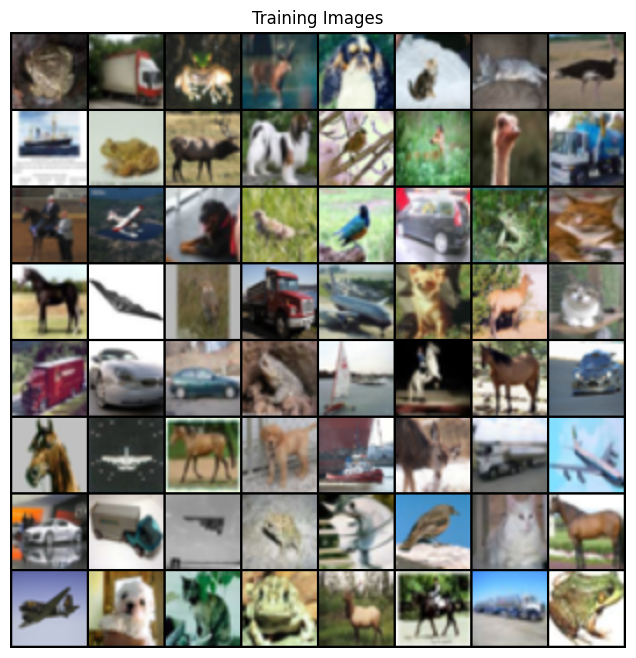

In [7]:
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(utils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

### [Step4] Weight Init

In [8]:
def weights_init(w):
    classname = w.__class__.__name__
    if classname.find("conv") != -1:
        nn.init.normal_(w.weight.data, 0.0, 0.02)
    elif classname.find("bn") != -1:
        nn.init.normal_(w.weight.data, 1.0, 0.02)
        nn.init.constant_(w.bias.data, 0)

### [Step5] Set Network Structure

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.tconv1 = nn.ConvTranspose2d(100, 64*8, kernel_size=4, stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(64*8)
        self.tconv2 = nn.ConvTranspose2d(64*8, 64*4, 4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(64*4)
        self.tconv3 = nn.ConvTranspose2d(64*4, 64*2, 4, 2, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(64*2)
        self.tconv4 = nn.ConvTranspose2d(64*2, 64, 4, 2, 1, bias=False)
        self.bn4 = nn.BatchNorm2d(64)
        self.tconv5 = nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False)

    def forward(self, x):
        x = F.relu(self.bn1(self.tconv1(x)))
        x = F.relu(self.bn2(self.tconv2(x)))
        x = F.relu(self.bn3(self.tconv3(x)))
        x = F.relu(self.bn4(self.tconv4(x)))
        x = F.tanh(self.tconv5(x))

        return x

In [12]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 4, 2, 1, bias=False) # 3 x 64 x 64
        self.conv2 = nn.Conv2d(64, 64*2, 4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(64*2)
        self.conv3 = nn.Conv2d(64*2, 64*4, 4, 2, 1, bias=False) # 64 x 2 x 16 x 16
        self.bn3 = nn.BatchNorm2d(64*4)
        self.conv4 = nn.Conv2d(64*4, 64*8, 4, 2, 1, bias=False)# 64 x 4 x 8 x 8
        self.bn4 = nn.BatchNorm2d(64*8)
        self.conv5 = nn.Conv2d(64*8, 1, 4, 1, 0, bias=False)# 64 x 4 x 4 x 4

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2, True)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2, True)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2, True)
        x = F.leaky_relu(self.bn4(self.conv4(x)), 0.2, True)
        x = F.sigmoid(self.conv5(x))

        return x

### [Step6] Create Model Instance

In [13]:
gen = Generator().to(device)
disc = Discriminator().to(device)

gen.apply(weights_init)
disc.apply(weights_init)

print(gen)
print(disc)

Generator(
  (tconv1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tconv5): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
)
Discriminator(
  (conv1): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (conv2): Conv2d(64, 128, kernel_size=(

### [Step7] Model Compile

In [14]:
loss = nn.BCELoss()
opt_G = torch.optim.Adam(gen.parameters(), lr=lr, betas=(b1, b2))
opt_D = torch.optim.Adam(disc.parameters(), lr=lr, betas=(b1, b2))

In [17]:
fixed_noise = torch.randn(64, 100, 1, 1, device=device)
real_label = 1
fake_label = 0

### [Step8] Training Model

In [18]:
img_list = []
G_losses = []
D_losses = []
iters = 0
for epoch in range(n_epochs):
    for i, data in enumerate(dataloader, 0):
        # 1. Discriminator 학습
        # 1-1. Real data
        real_img = data[0].to(device)
        b_size = real_img.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)

        disc.zero_grad()
        output = disc(real_img).view(-1)
        real_loss = loss(output, label)
        real_loss.backward()
        D_x = output.mean().item()

        # 1-2. Fake data
        noise = torch.randn(b_size, 100, 1, 1, device=device)
        fake = gen(noise)
        label.fill_(fake_label)

        output = disc(fake.detach()).view(-1)
        fake_loss = loss(output, label)
        fake_loss.backward()

        D_G_z1 = output.mean().item()
        disc_loss = real_loss + fake_loss

        opt_D.step()

        # 2. Generator 학습
        gen.zero_grad()
        label.fill_(real_label)
        output = disc(fake).view(-1)
        gen_loss = loss(output, label)
        gen_loss.backward()
        D_G_z2 = output.mean().item()
        opt_G.step()

        if i % 50 == 0:
            print('[{}/{}][{}/{}]'.format(epoch+1, n_epochs, i, len(dataloader)))
            print('Discriminator Loss:{:.4f}\t Generator Loss:{:.4f}\t D(x):{:.4f}\t D(G(z)):{:.4f}/{:.4f}'.format(disc_loss.item(), gen_loss.item(), D_x, D_G_z1, D_G_z2))

        G_losses.append(gen_loss.item())
        D_losses.append(disc_loss.item())

        if (iters % 500 == 0) or ((epoch == n_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = gen(fixed_noise).detach().cpu()
            img_list.append(utils.make_grid(fake, padding=2, normalize=True))

        iters += 1

[1/5][0/391]
Discriminator Loss:1.4558	 Generator Loss:3.3406	 D(x):0.4750	 D(G(z)):0.4933/0.0374
[1/5][50/391]
Discriminator Loss:0.0660	 Generator Loss:9.3543	 D(x):0.9413	 D(G(z)):0.0027/0.0001
[1/5][100/391]
Discriminator Loss:0.6228	 Generator Loss:3.6324	 D(x):0.7069	 D(G(z)):0.1843/0.0290
[1/5][150/391]
Discriminator Loss:0.2424	 Generator Loss:4.5710	 D(x):0.8923	 D(G(z)):0.1105/0.0138
[1/5][200/391]
Discriminator Loss:0.5777	 Generator Loss:3.9635	 D(x):0.9232	 D(G(z)):0.3587/0.0279
[1/5][250/391]
Discriminator Loss:0.5036	 Generator Loss:2.8213	 D(x):0.7494	 D(G(z)):0.1594/0.0710
[1/5][300/391]
Discriminator Loss:0.2802	 Generator Loss:4.3176	 D(x):0.8629	 D(G(z)):0.1061/0.0161
[1/5][350/391]
Discriminator Loss:0.3292	 Generator Loss:3.8328	 D(x):0.7692	 D(G(z)):0.0374/0.0280
[2/5][0/391]
Discriminator Loss:2.2105	 Generator Loss:4.3867	 D(x):0.9753	 D(G(z)):0.7520/0.0375
[2/5][50/391]
Discriminator Loss:1.8559	 Generator Loss:3.9957	 D(x):0.2165	 D(G(z)):0.0046/0.0444
[2/5][

### [Step9] Visualizing Generated Data

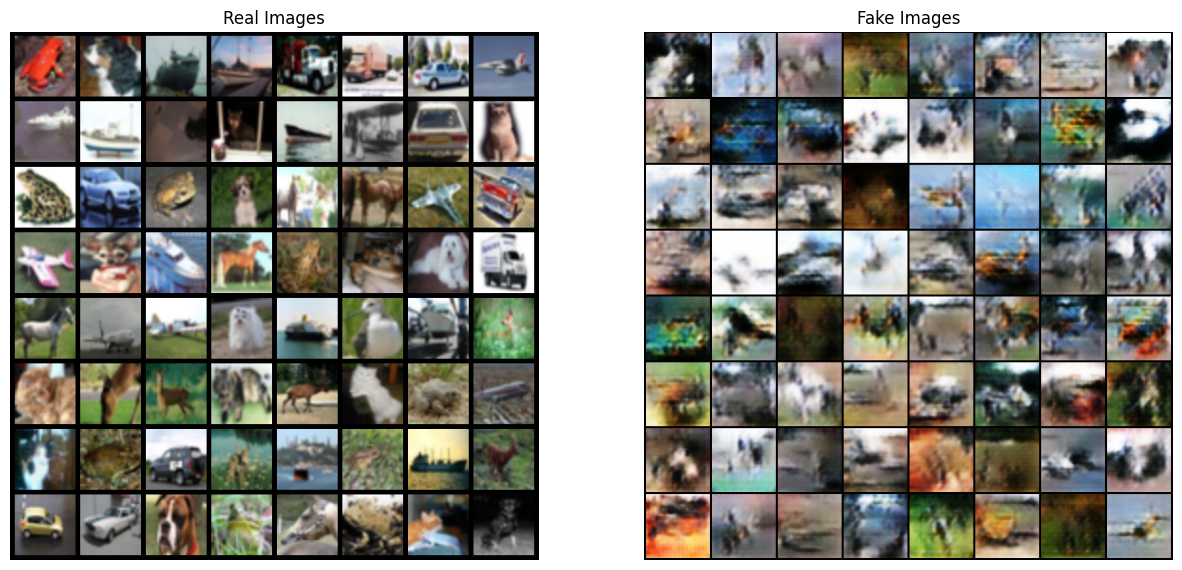

In [19]:
#real images
real_batch = next(iter(dataloader))
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(utils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

#generated images
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()